In [0]:
!pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [0]:
!pip install pyspark raster2xyz

  Using cached pyspark-3.5.1-py2.py3-none-any.whl
  Using cached raster2xyz-0.1.3-py3-none-any.whl
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)


In [0]:
from pyspark.sql import SparkSession
import os
import time
import matplotlib.pyplot as plt
spark = SparkSession.builder.master('local[*]').getOrCreate()
num = 32

In [0]:
def bench(arquivo):
    start_time = time.time()
    df = spark.read.format("csv").option("header", True).load(arquivo)
    df.write.format("noop").mode("overwrite").save()
    end_time = time.time()
    return end_time - start_time

In [0]:
def plot_time_percentage(arquivos):
    times = []
    total_time = 0

    for arquivo in arquivos:
        time_taken = bench(arquivo)
        times.append(time_taken)
        total_time += time_taken

    percentages = [(time / total_time) * 100 for time in times]

    plt.figure(figsize=(10, 6))
    plt.bar(arquivos, percentages, color='skyblue')
    plt.xlabel('File')
    plt.ylabel('% Time')
    plt.title('Percentage Time Taken for Processing Each File')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [0]:
def plot_time_percentage2(arquivos):
    times = []
    total_time = 0

    for arquivo in arquivos:
        time_taken = bench(arquivo)
        times.append(time_taken)
        total_time += time_taken

    percentages = [(time / total_time) * 100 for time in times]

    plt.figure(figsize=(10, 6))
    plt.plot(arquivos, percentages, marker='o', color='skyblue', linestyle='-')
    plt.xlabel('File')
    plt.ylabel('% Time')
    plt.title('Percentage Time Taken for Processing Each File')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [0]:
def plot_stacked_bar(arquivos):
    plt.figure(figsize=(10, 6))

    total_times = []
    percentages_list = []

    for arquivo in arquivos:
        times = []
        time_taken = bench(arquivo)
        times.append(time_taken)

        total_time = sum(times)
        total_times.append(total_time)

        percentages = [(time / total_time) * 100 for time in times]
        percentages_list.append(percentages)

    bottoms = None
    for i, percentages in enumerate(percentages_list):
        if i == 0:
            plt.bar("Total Time", total_times[i], label=arquivos[i])
            bottoms = total_times[i]
        else:
            plt.bar("Total Time", total_times[i], bottom=bottoms, label=arquivos[i])
            bottoms += total_times[i]

    plt.xlabel('Total Time')
    plt.ylabel('Percentage Time')
    plt.title('Stacked Bar Chart of Total Time with Percentage Time for Each File')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [0]:
def plot_pie_chart(arquivos):
    total_times = []
    percentages = []

    for arquivo in arquivos:
        time_taken = bench(arquivo)
        total_times.append(time_taken)

    total_time = sum(total_times)
    percentages = [(time / total_time) * 100 for time in total_times]

    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=arquivos, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Time Taken by Each File')
    plt.axis('equal')
    plt.show()

10 min


In [0]:
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_10m_tavg.zip
!unzip -o wc2.1_10m_tavg.zip

--2024-05-04 23:40:01--  https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_10m_tavg.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_10m_tavg.zip [following]
--2024-05-04 23:40:01--  https://data.biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_10m_tavg.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37364656 (36M) [application/zip]
Saving to: ‘wc2.1_10m_tavg.zip.3’

wc2.1_10m_tavg.zip. 100%[===================>]  35.63M  19.3MB/s    in 1.8s    

2024-05-04 23:40:03 (19.3 MB/s) - ‘wc2.1_10m_tavg.zip.3’ saved [37364656/37364656]

Archive:  wc2.1_10m_tavg.zip
  

In [0]:
!raster2xyz wc2.1_10m_tavg_01.tif wc2.1_10m_tavg_01.csv

[2024-05-04 11:40:42 - INFO] - Getting geotransform and data...
[2024-05-04 11:40:42 - INFO] - Getting XYZ data...
[2024-05-04 11:40:43 - INFO] - Getting geotransformed coordinates...
[2024-05-04 11:40:43 - INFO] - Building XYZ data...
[2024-05-04 11:41:40 - INFO] - New XYZ (csv file) created...


In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_10m_tavg_01.tif", "dbfs:/FileStore/tables/wc2.1_10m_tavg_01.tif")

Out[13]: True

In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_10m_tavg_01.csv", "dbfs:/FileStore/tables/wc2.1_10m_tavg_01.csv")

Out[14]: True

In [0]:
arquivo='dbfs:/FileStore/tables/wc2.1_10m_tavg_01.csv'

In [0]:
for i in range(num):
 %time bench(arquivo)

CPU times: user 12 ms, sys: 4.84 ms, total: 16.9 ms
Wall time: 9.21 s
CPU times: user 6.57 ms, sys: 4.04 ms, total: 10.6 ms
Wall time: 8.02 s
CPU times: user 9.36 ms, sys: 848 µs, total: 10.2 ms
Wall time: 7.62 s
CPU times: user 10.1 ms, sys: 536 µs, total: 10.6 ms
Wall time: 7.05 s
CPU times: user 30.8 ms, sys: 2.83 ms, total: 33.6 ms
Wall time: 50.7 s
CPU times: user 11.1 ms, sys: 268 µs, total: 11.3 ms
Wall time: 10.2 s
CPU times: user 9.54 ms, sys: 1.27 ms, total: 10.8 ms
Wall time: 9.39 s
CPU times: user 10.5 ms, sys: 476 µs, total: 10.9 ms
Wall time: 8.92 s
CPU times: user 9.82 ms, sys: 91 µs, total: 9.91 ms
Wall time: 7.07 s
CPU times: user 26.1 ms, sys: 15 ms, total: 41.1 ms
Wall time: 50.3 s
CPU times: user 12.5 ms, sys: 777 µs, total: 13.2 ms
Wall time: 12.6 s
CPU times: user 12 ms, sys: 283 µs, total: 12.3 ms
Wall time: 10.5 s
CPU times: user 4.4 ms, sys: 7.36 ms, total: 11.8 ms
Wall time: 10.4 s
CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 7.18 s
CPU times:

5min

In [0]:
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_5m_tavg.zip
!unzip -o wc2.1_5m_tavg.zip

--2024-05-04 23:54:25--  https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_5m_tavg.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_5m_tavg.zip [following]
--2024-05-04 23:54:25--  https://data.biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_5m_tavg.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126719768 (121M) [application/zip]
Saving to: ‘wc2.1_5m_tavg.zip.1’

wc2.1_5m_tavg.zip.1 100%[===================>] 120.85M  27.4MB/s    in 4.5s    

2024-05-04 23:54:30 (26.6 MB/s) - ‘wc2.1_5m_tavg.zip.1’ saved [126719768/126719768]

Archive:  wc2.1_5m_tavg.zip
  in

In [0]:
!raster2xyz wc2.1_5m_tavg_01.tif wc2.1_5m_tavg_01.csv

[2024-05-04 11:55:09 - INFO] - Getting geotransform and data...
[2024-05-04 11:55:10 - INFO] - Getting XYZ data...
[2024-05-04 11:55:12 - INFO] - Getting geotransformed coordinates...
[2024-05-04 11:55:16 - INFO] - Building XYZ data...
[2024-05-04 11:59:12 - INFO] - New XYZ (csv file) created...


In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_5m_tavg_01.tif", "dbfs:/FileStore/tables/wc2.1_5m_tavg_01.tif")

Out[26]: True

In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_5m_tavg_01.csv", "dbfs:/FileStore/tables/wc2.1_5m_tavg_01.csv")

Out[27]: True

In [0]:
arquivo='dbfs:/FileStore/tables/wc2.1_5m_tavg_01.csv'

In [0]:
for i in range(num):
 %time benchmark(arquivo)

2.5min

In [0]:
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_tavg.zip
!unzip -o wc2.1_2.5m_tavg.zip

--2024-05-05 00:07:07--  https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_tavg.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_tavg.zip [following]
--2024-05-05 00:07:08--  https://data.biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_tavg.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443224846 (423M) [application/zip]
Saving to: ‘wc2.1_2.5m_tavg.zip’

wc2.1_2.5m_tavg.zip 100%[===================>] 422.69M  37.1MB/s    in 12s     

2024-05-05 00:07:20 (35.3 MB/s) - ‘wc2.1_2.5m_tavg.zip’ saved [443224846/443224846]

Archive:  wc2.1_2.5m_tavg.

In [0]:
!raster2xyz wc2.1_2.5m_tavg_01.tif wc2.1_2.5m_tavg_01.csv

[2024-05-05 12:08:10 - INFO] - Getting geotransform and data...
[2024-05-05 12:08:15 - INFO] - Getting XYZ data...
[2024-05-05 12:08:21 - INFO] - Getting geotransformed coordinates...
[2024-05-05 12:08:26 - INFO] - Building XYZ data...
[2024-05-05 12:16:01 - INFO] - New XYZ (csv file) created...


In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_2.5m_tavg_01.tif", "dbfs:/FileStore/tables/wc2.1_2.5m_tavg_01.tif")

Out[39]: True

In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_2.5m_tavg_01.csv", "dbfs:/FileStore/tables/wc2.1_2.5m_tavg_01.csv")

Out[40]: True

In [0]:
arquivo='dbfs:/FileStore/tables/wc2.1_2.5m_tavg_01.csv'

In [0]:
for i in range(num):
 %time benchmark(arquivo)

30s

In [0]:
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_30s_tavg.zip
!unzip -o wc2.1_30s_tavg.zip

In [0]:
!raster2xyz wc2.1_30s_tavg_01.tif wc2.1_30s_tavg_01.csv

In [0]:
dbutils.fs.cp("file:/databricks/driver/wc2.1_30s_tavg_01.csv", "dbfs:/FileStore/tables/wc2.1_30s_tavg_01.csv")

In [0]:
arquivo='dbfs:/FileStore/tables/wc2.1_30s_tavg_01.csv'

In [0]:
for i in range(num):
 %time benchmark(arquivo)

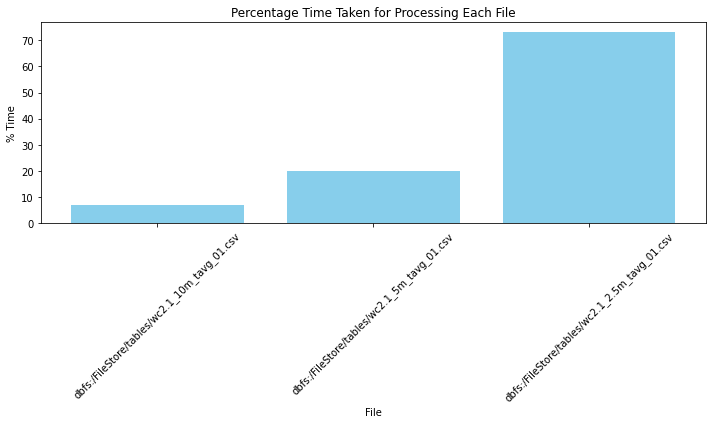

In [0]:
#, "wc2.1_30s_tavg_01.csv"
arquivos = ["dbfs:/FileStore/tables/wc2.1_10m_tavg_01.csv", "dbfs:/FileStore/tables/wc2.1_5m_tavg_01.csv", "dbfs:/FileStore/tables/wc2.1_2.5m_tavg_01.csv"]
plot_time_percentage(arquivos)

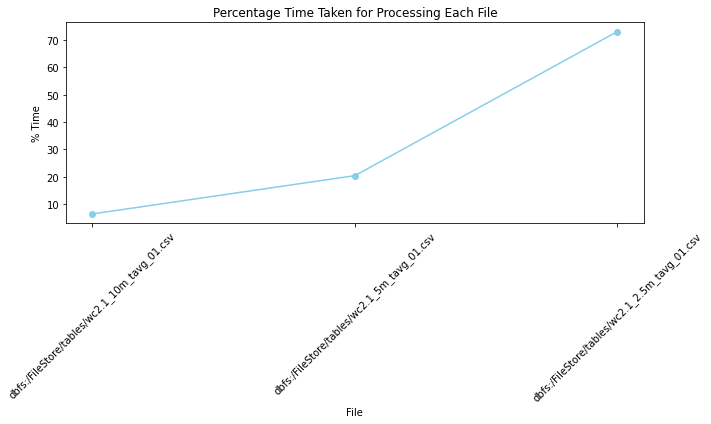

In [0]:
plot_time_percentage2(arquivos)

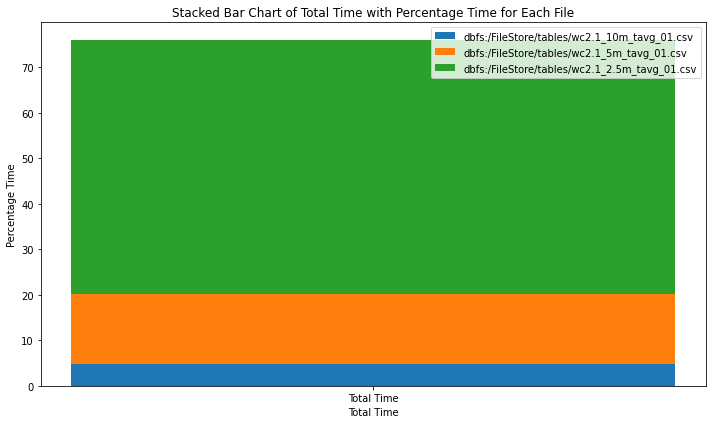

In [0]:
plot_stacked_bar(arquivos)

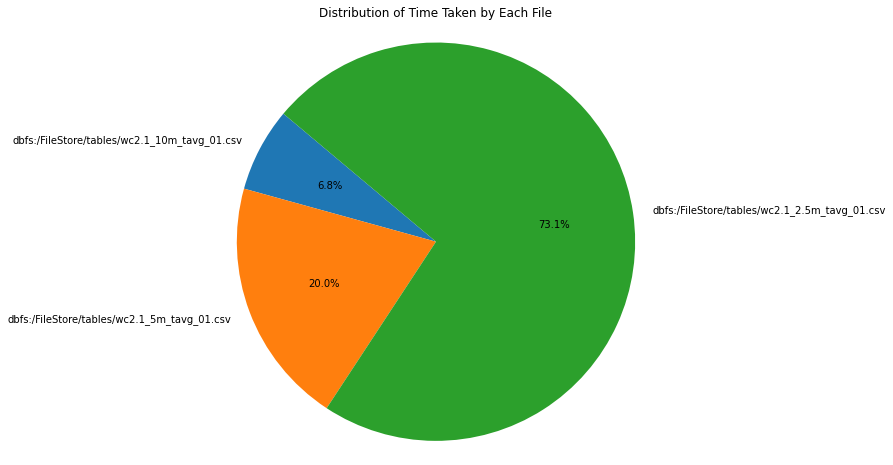

In [0]:
plot_pie_chart(arquivos)